In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1' # Prevent warning message of kmeans
import numpy as np
import mglearn
import matplotlib.pyplot as plt

# **k-Means-Clustering**
**View algorithm**

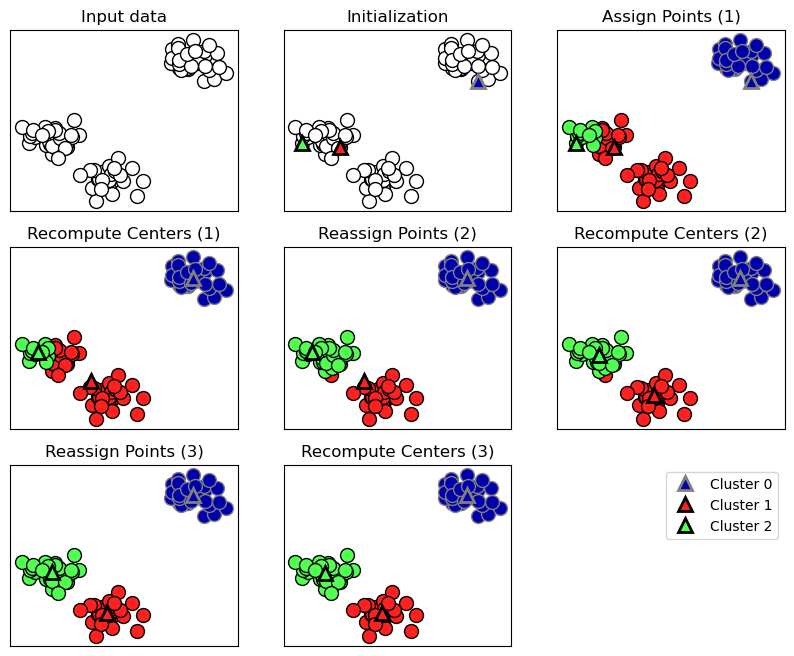

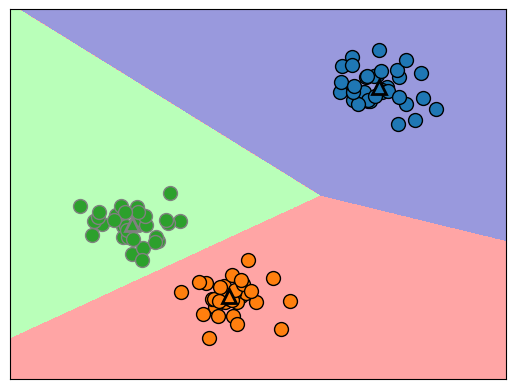

In [2]:
mglearn.plots.plot_kmeans_algorithm()
plt.show()
mglearn.plots.plot_kmeans_boundaries()

In [3]:
import inspect

# Get parameters of function mglearn.discrete_scatter
inspect.signature(mglearn.discrete_scatter)

<Signature (x1, x2, y=None, markers=None, s=10, ax=None, labels=None, padding=0.2, alpha=1, c=None, markeredgewidth=None)>

**Apply k-Means with three clusters**

Cluster assignments:
[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]

K-Means predictions:
[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


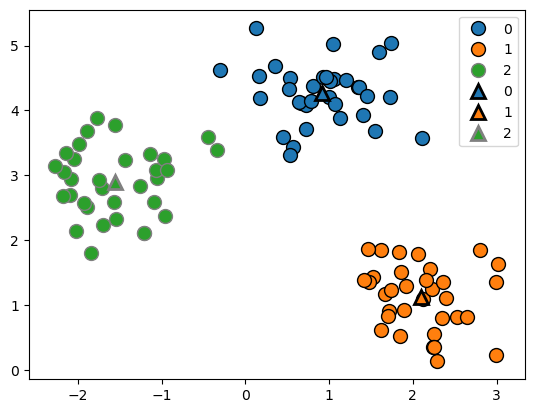

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create synthetic data
X, y = make_blobs(n_samples=100, cluster_std=0.5, random_state=0)

# Train k-Means model
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X)

# View cluster assignments and predictions
print('Cluster assignments:\n{}\n'.format(kmeans.labels_))
print('K-Means predictions:\n{}'.format(kmeans.predict(X)))

# Plot clusters
mglearn.discrete_scatter(x1=X[:, 0], x2=X[:, 1], y=kmeans.labels_, markers='o')
mglearn.discrete_scatter(x1=kmeans.cluster_centers_[:, 0], x2=kmeans.cluster_centers_[:, 1], y=[0, 1, 2], markers='^', markeredgewidth=2)
plt.legend()
plt.show()

**Apply k-Means with two and five clusters**

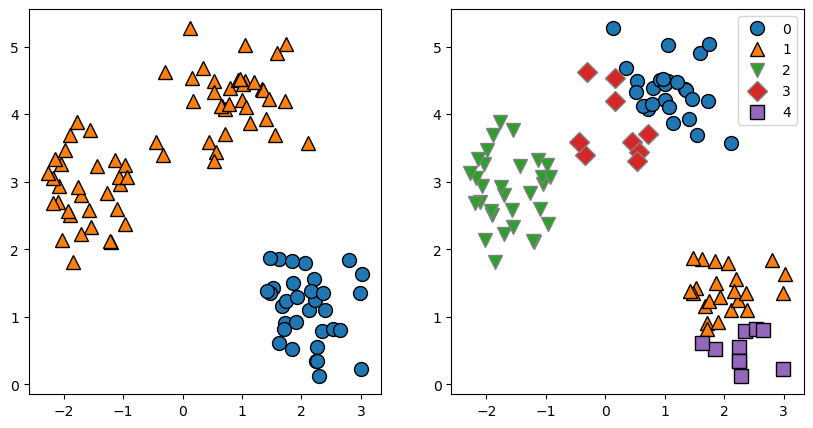

In [5]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Two clusters
kmeans = KMeans(n_clusters=2, n_init='auto')
assignments = kmeans.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# Five clusters
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=0)
assignments = kmeans.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.legend()
plt.show()

**When fails k-Means?**

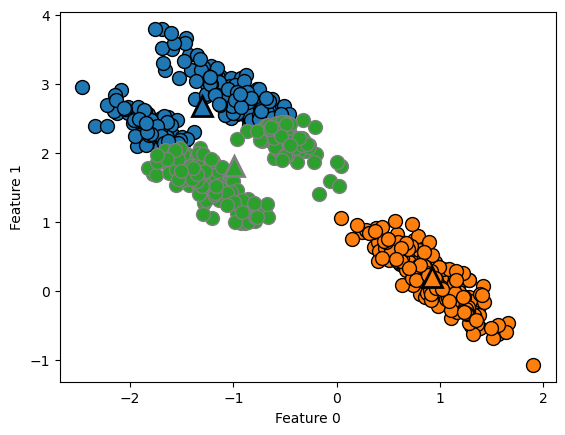

In [6]:
# Create synthetic data
X, y = make_blobs(n_samples=600, cluster_std=0.5, random_state=0)
rng = np.random.RandomState(13)

# Transform the dataset
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Train k-Means model
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=2)
kmeans.fit(X)

# Plot clusters
mglearn.discrete_scatter(x1=X[:, 0], x2=X[:, 1], y=kmeans.labels_, markers='o')
mglearn.discrete_scatter(x1=kmeans.cluster_centers_[:, 0], x2=kmeans.cluster_centers_[:, 1], y=[0, 1, 2], s=15, markers='^', markeredgewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

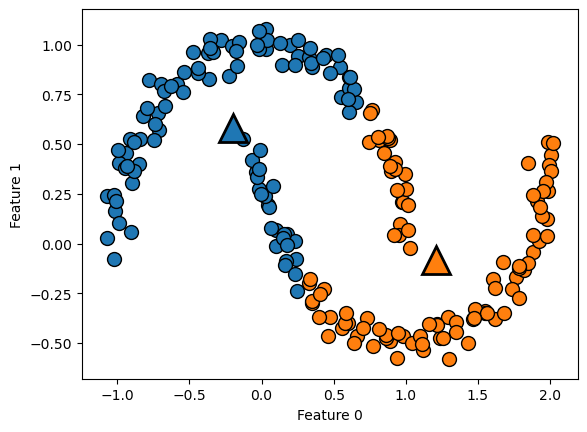

In [7]:
from sklearn.datasets import make_moons

# Create synthetic data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Train k-Means model
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
kmeans.fit(X)

# Plot clusters
mglearn.discrete_scatter(x1=X[:, 0], x2=X[:, 1], y=kmeans.labels_, markers='o')
mglearn.discrete_scatter(x1=kmeans.cluster_centers_[:, 0], x2=kmeans.cluster_centers_[:, 1], y=[0, 1], s=20, markers='^', markeredgewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

# **Agglomerative Clustering**
**View algorithm**

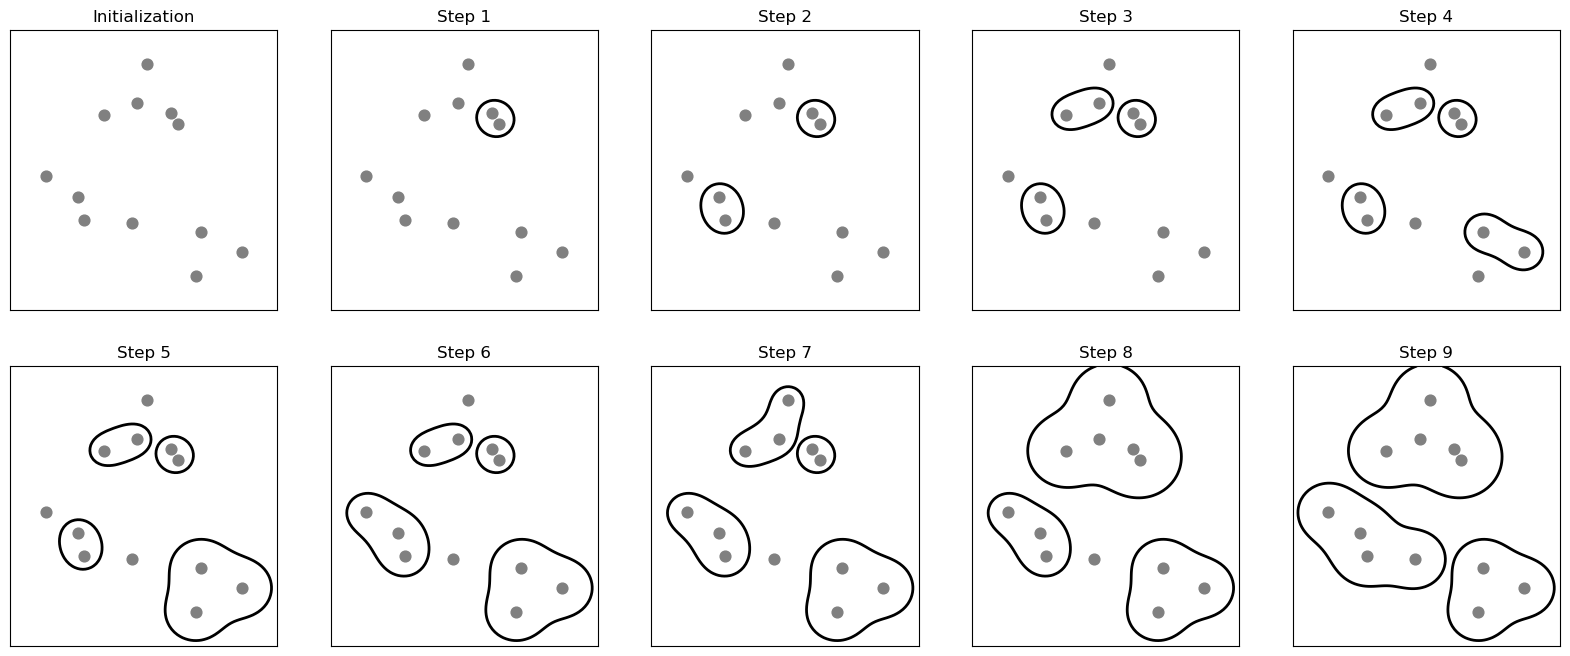

In [8]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

**Apply Agglomerative-Clustering**

Cluster labels:
[1 2 1 2 2 2 0 0 1 2 2 2 1 2 0 1 0 2 0 0 0 0 0 2 1 1 1 1 0 0 2 1 1 2 0 0 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 0 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 2 2 1
 1 2 2 2 0 1 2 2 1 2 1 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0]



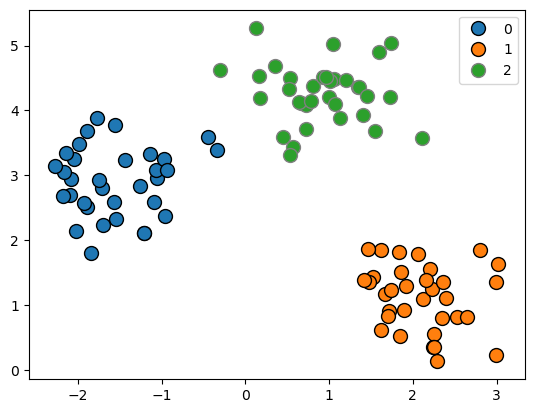

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Create synthetic data
X, y = make_blobs(n_samples=100, cluster_std=0.5, random_state=0)

# Train agglomerative model
agg = AgglomerativeClustering(n_clusters=3)
assignments = agg.fit_predict(X) # No predict method for agglomerative clustering

# View cluster assignments
print('Cluster labels:\n{}\n'.format(assignments)) # Or agg.labels_

# Plot clusters
mglearn.discrete_scatter(x1=X[:, 0], x2=X[:, 1], y=assignments, markers='o')
plt.legend()
plt.show()

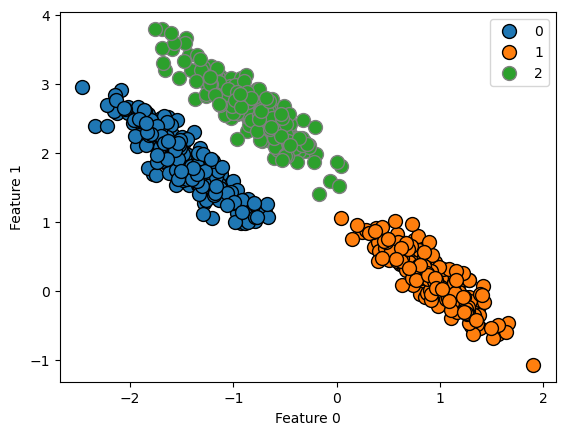

In [10]:
# Create synthetic data
X, y = make_blobs(n_samples=600, cluster_std=0.5, random_state=0)
rng = np.random.RandomState(13)

# Transform the dataset
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Train agglomerative model
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

# Plot clusters
mglearn.discrete_scatter(x1=X[:, 0], x2=X[:, 1], y=agg.labels_, markers='o')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

**When fails Agglomerative-Clustering?**

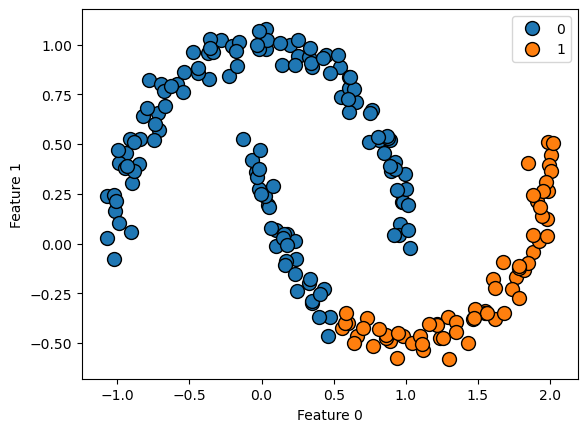

In [11]:
# Create synthetic data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Train agglomerative model
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X)

# Plot clusters
mglearn.discrete_scatter(x1=X[:, 0], x2=X[:, 1], y=agg.labels_, markers='o')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

# **DBSCAN**
**View algorithm**

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


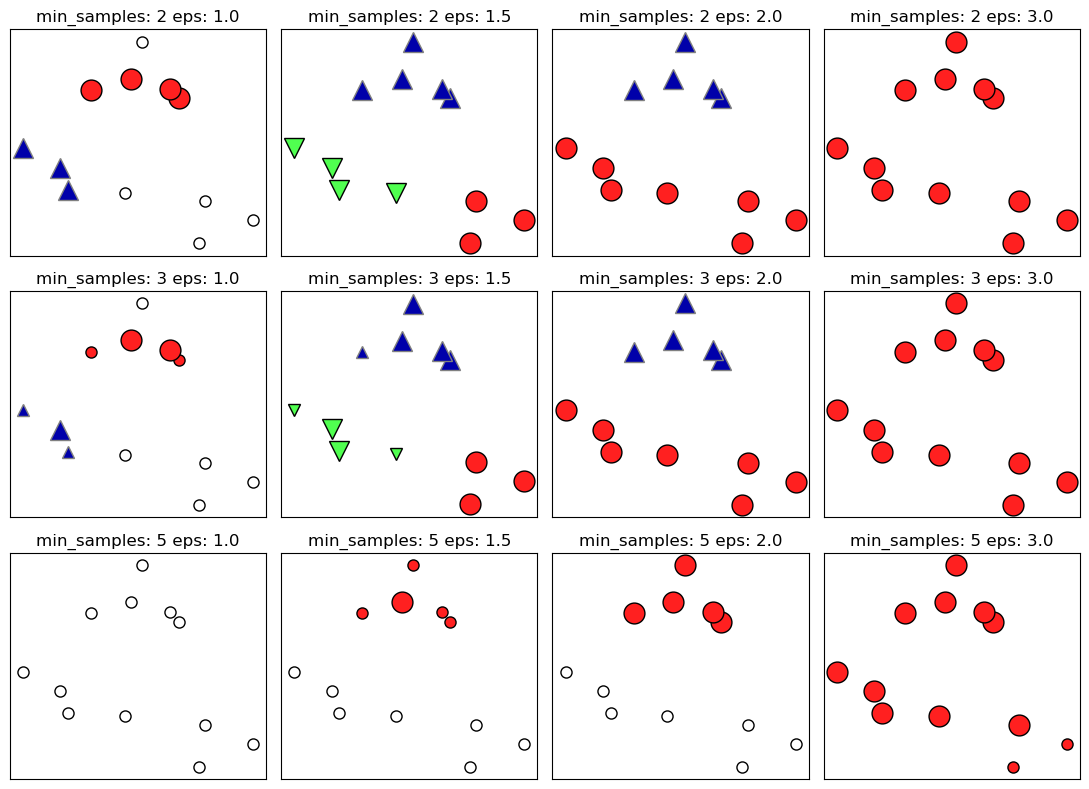

In [12]:
mglearn.plots.plot_dbscan()
plt.show()

**Apply DBSCAN**

Cluster labels:
[ 0  1  0  1  1  1  2  2  0  1  1 -1  0 -1  2 -1  2  1  2  2  2  2  2  1
  0  0  0  0  2  2 -1 -1  0  1  2 -1  1  0  0  2  2  0  0 -1  1  1  0  0
  2  2 -1  0  1  0  2  2  0  0  1 -1  0  2  2  2  2  0  1  2  0  1  2 -1
  1 -1  0  1  1  1  2  0  1  1  0  1  0  1  1  1  0  1  0  0  2  2  2  2
  1  1  2  2]



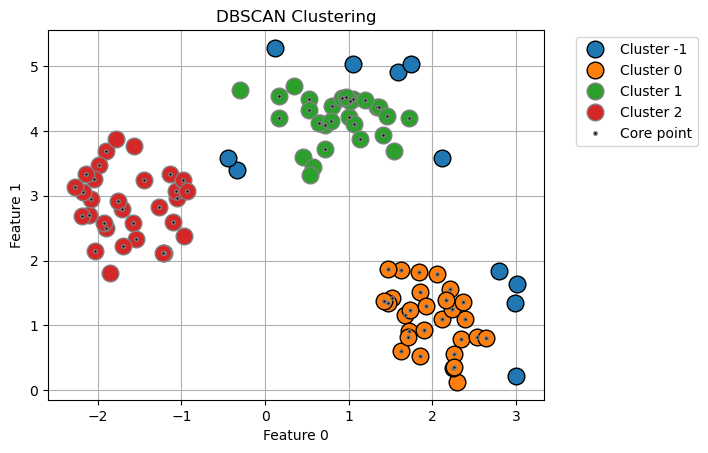

In [13]:
from sklearn.cluster import DBSCAN

# Create synthetic data
X, y = make_blobs(n_samples=100, cluster_std=0.5, random_state=0)

# Train DBSCAN model and get cluster assignments
dbscan = DBSCAN(eps=0.5, min_samples=5)
assignments = dbscan.fit_predict(X)

# View cluster assignments
print('Cluster labels:\n{}\n'.format(assignments)) # Or dbscan.labels_

# Get indizes of core points
core_points_mask = np.zeros_like(assignments, dtype=bool) # Create list with same length as assignments containing only zero/False values
core_points_mask[dbscan.core_sample_indices_] = True # Set core point indices to one/True

# Plot all points as dots and mark core points with a dot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y=assignments, s=12, markers='o')
mglearn.discrete_scatter(X[core_points_mask][:, 0], X[core_points_mask][:, 1], y=assignments[core_points_mask], markers='.', s=5, c='k')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)

# Create legend
legend_labels = ['Cluster ' + str(i) for i in np.unique(assignments)] + ['Core point'] # Get unique labels and set legend labels dynamically
handles, labels = plt.gca().get_legend_handles_labels() # Get handles and labels from all scatter plots
plt.legend(handles, legend_labels, loc='best', bbox_to_anchor=(1.05, 1.0))
plt.show()

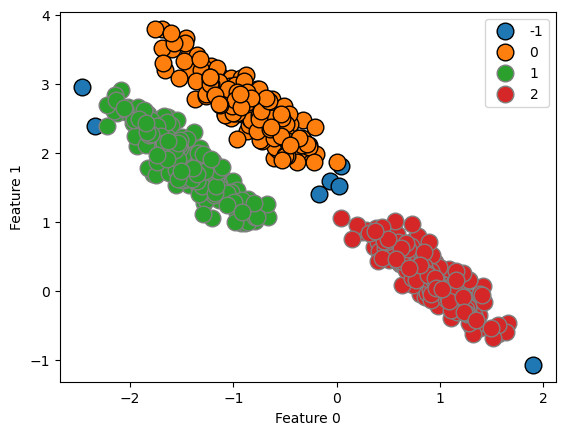

In [14]:
# Create synthetic data
X, y = make_blobs(n_samples=600, cluster_std=0.5, random_state=0)
rng = np.random.RandomState(13)

# Transform the dataset
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Train DBSCAN model
dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan.fit(X)

# Plot clusters
mglearn.discrete_scatter(X[:, 0], X[:, 1], y=dbscan.labels_, s=12, markers='o')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

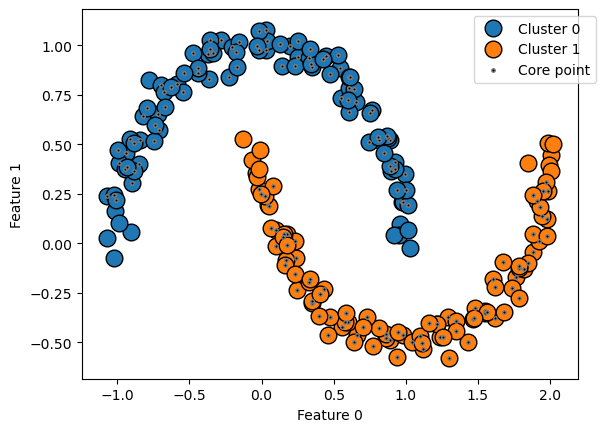

In [15]:
# Create synthetic data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Train DBSCAN model and get cluster assignments
dbscan = DBSCAN(eps=0.3, min_samples=15)
assignments = dbscan.fit_predict(X)

# Get indizes of core points
core_points_mask = np.zeros_like(assignments, dtype=bool) # Create list with same length as assignments containing only zero/False values
core_points_mask[dbscan.core_sample_indices_] = True # Set core point indices to one/True

# Plot all points as dots and mark core points with a dot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y=assignments, s=12, markers='o')
mglearn.discrete_scatter(X[core_points_mask][:, 0], X[core_points_mask][:, 1], y=assignments[core_points_mask], markers='.', s=5, c='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Create legend
legend_labels = ['Cluster ' + str(i) for i in np.unique(assignments)] + ['Core point'] # Get unique labels and set legend labels dynamically
handles, labels = plt.gca().get_legend_handles_labels() # Get handles and labels from all scatter plots
plt.legend(handles, legend_labels, loc='best', bbox_to_anchor=(1.05, 1.0))
plt.show()